<a href="https://colab.research.google.com/github/Eleemon98/Colaboratory/blob/main/0322_test%ED%95%B4%EC%84%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,X20,X86,X87,X88,X113,X115,X116,X117,X119,X120,...,X527,X570,X571,X572,X573,X574,X575,X576,X577,Pass.Fail
0,1.4026,2.3895,0.9690,1747.6049,0.9460,748.6115,0.9908,58.4306,0.9804,6.3788,...,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0
1,1.3825,2.3754,0.9894,1931.6464,0.9425,731.2517,0.9902,58.6680,0.9731,6.5061,...,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0
2,1.4123,2.4532,0.9880,1685.8514,0.9231,718.5777,0.9899,58.4808,0.9772,6.4527,...,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,1
3,1.4011,2.4004,0.9904,1752.0968,0.9564,709.0867,0.9906,58.6635,0.9761,6.4935,...,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0
4,1.3888,2.4530,0.9902,1828.3846,0.9424,796.5950,0.9908,58.3858,0.9628,6.3551,...,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0


In [3]:
df = df.dropna()

In [4]:
df.isnull().sum()

X20          0
X86          0
X87          0
X88          0
X113         0
X115         0
X116         0
X117         0
X119         0
X120         0
X156         0
X221         0
X222         0
X223         0
X248         0
X250         0
X251         0
X252         0
X254         0
X255         0
X291         0
X359         0
X360         0
X361         0
X386         0
X388         0
X389         0
X390         0
X392         0
X393         0
X429         0
X493         0
X494         0
X495         0
X520         0
X522         0
X523         0
X524         0
X526         0
X527         0
X570         0
X571         0
X572         0
X573         0
X574         0
X575         0
X576         0
X577         0
Pass.Fail    0
dtype: int64

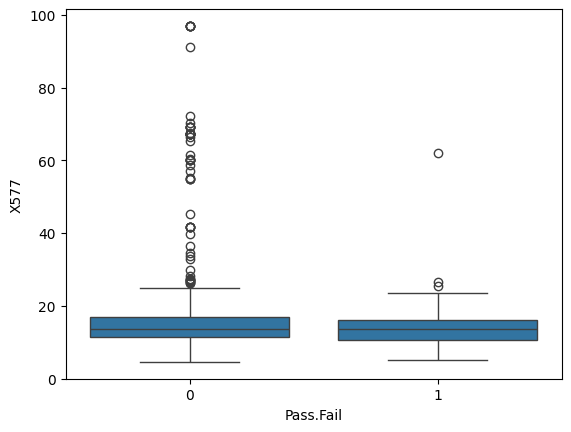

In [7]:
sns.boxplot(data=df, x='Pass.Fail', y='X577')
plt.show()

In [8]:
for c in df.columns:
  if len(df[c].value_counts()) < 5:
    print(c)

Pass.Fail


In [9]:
df_zero = df[df['Pass.Fail'] == 0]
df_one = df[df['Pass.Fail'] == 1]

In [10]:
df['Pass.Fail'].value_counts()

0    1104
1      82
Name: Pass.Fail, dtype: int64

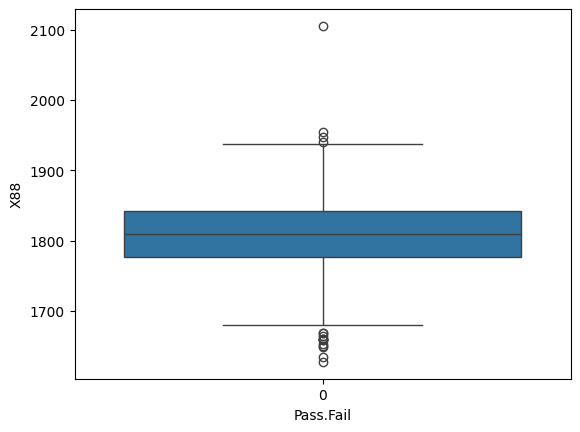

In [13]:
sns.boxplot(data=df_zero, x='Pass.Fail', y='X88')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state=1)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('acc : ', accuracy_score(y_test, pred))
print('f1 :', f1_score(y_test, pred))

acc :  0.9292929292929293
f1 : 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from imblearn.over_sampling import SMOTE

X_retrain, Xretest, y_retrain, y_retest = train_test_split(X, y, random_state=1)

# KNN 옵션으로 랜덤한 값으로 값을 늘려주는 방법
smote = SMOTE(k_neighbors=5, random_state=1)

# 2차원 데이터를 1차원으로 만들어주는 코드
X_tr_sam, y_tr_sam = smote.fit_resample(X_retrain, y_retrain)

In [21]:
y_tr_sam.value_counts()

0    828
1    828
Name: Pass.Fail, dtype: int64

In [24]:
len(X_tr_sam)

1656

In [25]:
len(X_retrain)

889

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

model = LogisticRegression()
model.fit(X_tr_sam, y_tr_sam)
pred = model.predict(X_test)

print('acc : ', accuracy_score(y_test, pred))
print('f1 :', f1_score(y_test, pred))

# 오버샘플링이나 언더샘플링으로는 분포가 바뀌지는 않기 때문에 좋은 결과가 나오지는 않는다.

acc :  0.6094276094276094
f1 : 0.14705882352941177


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
